In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

file_path = 'student_data.csv'
student_data = pd.read_csv(file_path)


In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


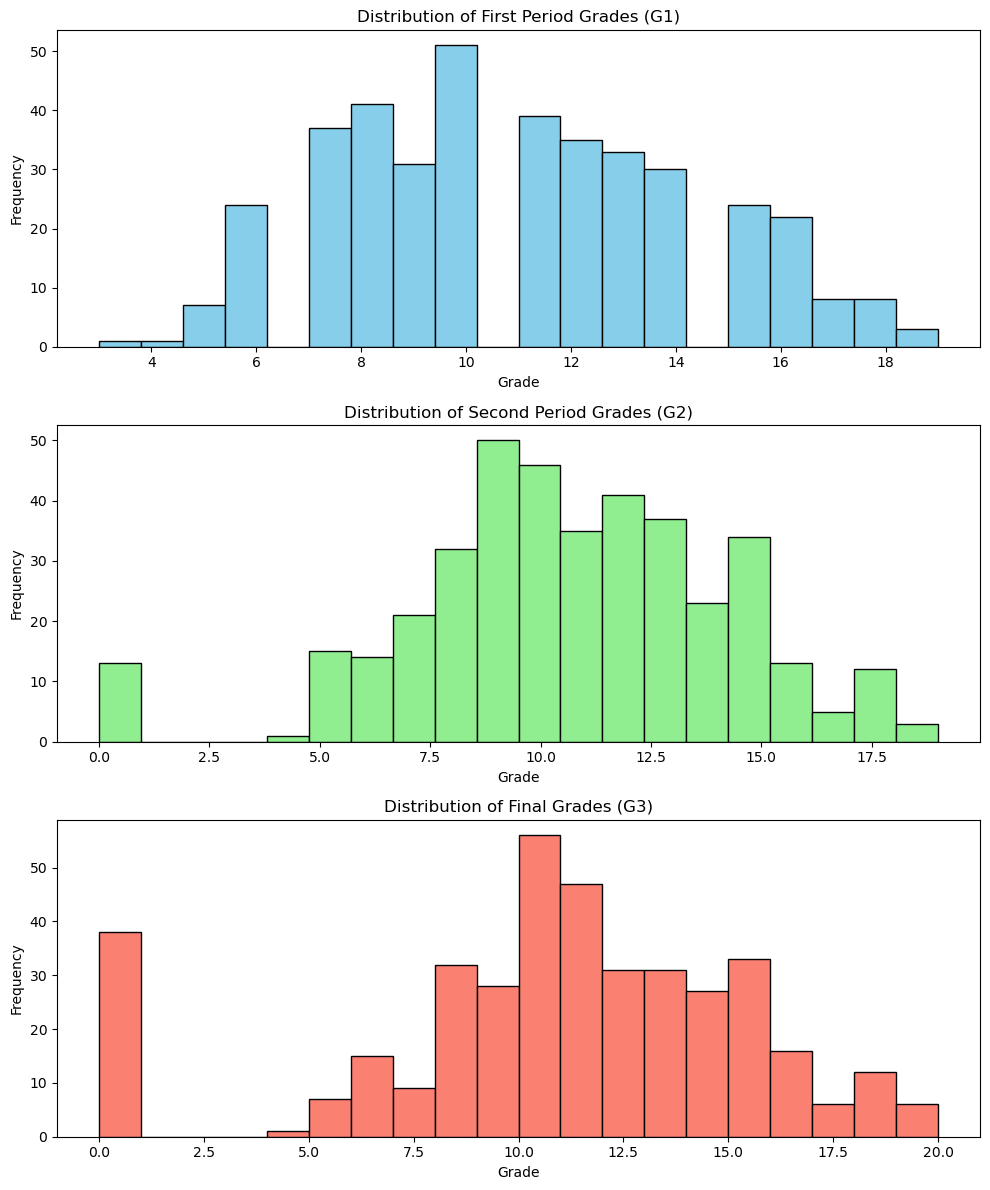

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histograms for G1, G2, G3
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# G1 histogram
axs[0].hist(student_data['G1'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of First Period Grades (G1)')
axs[0].set_xlabel('Grade')
axs[0].set_ylabel('Frequency')

# G2 histogram
axs[1].hist(student_data['G2'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Second Period Grades (G2)')
axs[1].set_xlabel('Grade')
axs[1].set_ylabel('Frequency')

# G3 histogram
axs[2].hist(student_data['G3'], bins=20, color='salmon', edgecolor='black')
axs[2].set_title('Distribution of Final Grades (G3)')
axs[2].set_xlabel('Grade')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




/tmp/ipykernel_668/1284641329.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = student_data.corr()


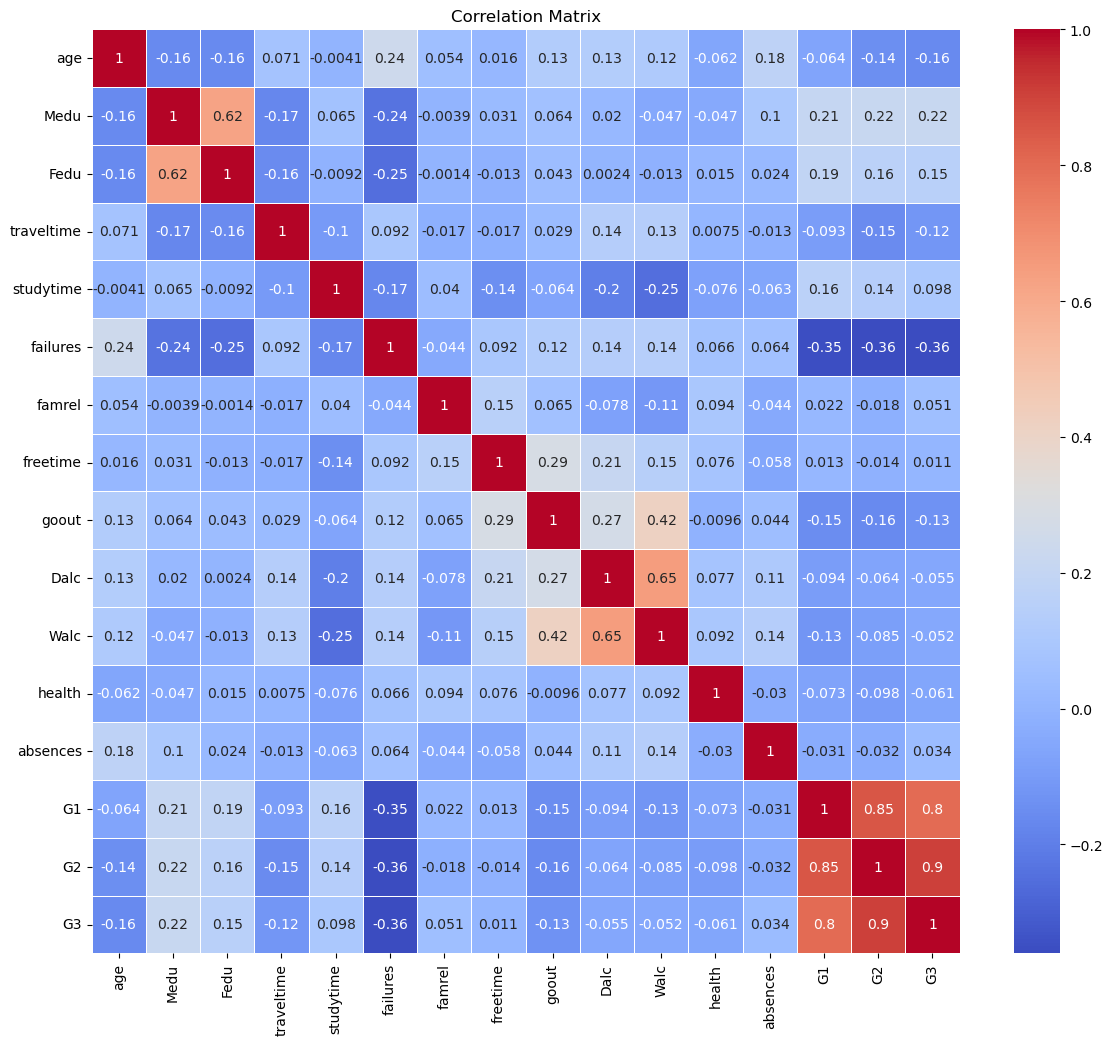

In [8]:
# Calculate the correlation matrix
corr_matrix = student_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [3]:
# Convert categorical variables to numerical using one-hot encoding
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
student_data_encoded = pd.get_dummies(student_data, columns=categorical_cols, drop_first=True)


In [4]:
# Select features and target
X = student_data_encoded.drop(columns=['G3'])
y = student_data_encoded['G3']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
y_pred = model.predict(X_test)


In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [16]:
print(f'MSE: {mse}, R2: {r2}')


MSE: 5.656642833231222, R2: 0.7241341236974022


In [17]:
# Define a function to simulate the personalized learning platform
def predict_grade_and_recommend(stud_data):
    # Convert input data to a DataFrame
    stud_df = pd.DataFrame([stud_data])
    
    # Predict the final grade using the trained model
    predicted_grade = model.predict(stud_df)[0]
    
    # Provide study recommendations based on the predicted grade
    if predicted_grade >= 15:
        recommendation = "Excellent work! Keep up the good study habits."
    elif predicted_grade >= 10:
        recommendation = "Good job! Focus on areas where you can improve to achieve higher grades."
    else:
        recommendation = "Consider revising your study plan. Seek help from teachers and use additional resources."
    
    return predicted_grade, recommendation


In [18]:
# Example input data (same structure as the encoded DataFrame)
example_student = {
    'age': 16,
    'Medu': 4,
    'Fedu': 4,
    'traveltime': 1,
    'studytime': 2,
    'failures': 0,
    'famrel': 4,
    'freetime': 3,
    'goout': 3,
    'Dalc': 1,
    'Walc': 1,
    'health': 3,
    'absences': 2,
    'G1': 14,
    'G2': 15,
    'school_MS': 0,
    'sex_M': 0,
    'address_U': 1,
    'famsize_LE3': 0,
    'Pstatus_T': 1,
    'Mjob_health': 0,
    'Mjob_other': 0,
    'Mjob_services': 0,
    'Mjob_teacher': 0,
    'Fjob_health': 0,
    'Fjob_other': 0,
    'Fjob_services': 0,
    'Fjob_teacher': 1,
    'reason_home': 0,
    'reason_other': 0,
    'reason_reputation': 1,
    'guardian_mother': 1,
    'guardian_other': 0,
    'schoolsup_yes': 0,
    'famsup_yes': 0,
    'paid_yes': 1,
    'activities_yes': 1,
    'nursery_yes': 1,
    'higher_yes': 1,
    'internet_yes': 1,
    'romantic_yes': 0
}

In [19]:
# Predict grade and get recommendations
predicted_grade, recommendation = predict_grade_and_recommend(example_student)

print(f'Predicted Grade: {predicted_grade}, Recommendation: {recommendation}')

Predicted Grade: 14.375360984571184, Recommendation: Good job! Focus on areas where you can improve to achieve higher grades.
